Этот набор данных был представлен для прогнозирования травм игроков.

In [ ]:
from google.colab import files
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *


uploaded = files.upload()

Saving injury_data.csv to injury_data.csv


In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['injury_data.csv']))
df.head(10)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1
5,38,75.820549,206.631824,1,0.359209,4,0
6,24,70.126050,177.044588,0,0.823552,2,0
7,36,79.038206,181.523155,1,0.820696,3,1
8,28,64.086096,183.794821,1,0.477350,1,1
9,28,66.829986,198.115048,1,0.350819,1,0


Набор данных содержит следующие значения:

1. Возраст игрока
2. Вес игрока
3. Рост игрока
4. Травмы, которые были у игрока до этого
5. Интенсивность тренировок
6. Время восстановления
7. Вероятность травмы




In [ ]:
df.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


Мы видим, что все распределения веса и роста игроков приблизительно являются нормальными распределелениями. Это также было понятно по тому, что среднее и медиана этих наборов данных совпадают.

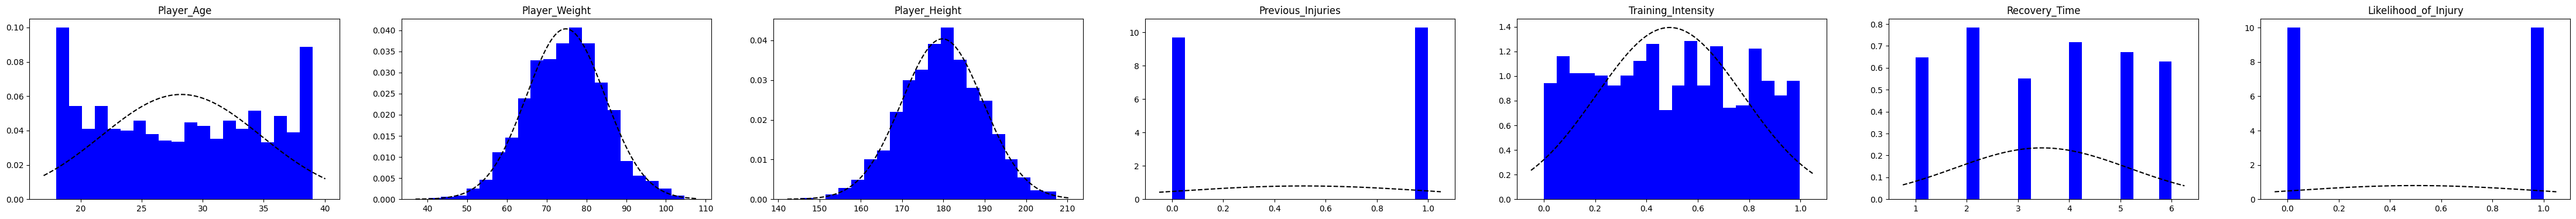

In [ ]:
keys = ['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time', 'Likelihood_of_Injury']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True,bins =20, color = 'blue')
    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 1000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed', color = 'black')
    ax.set_title(key)

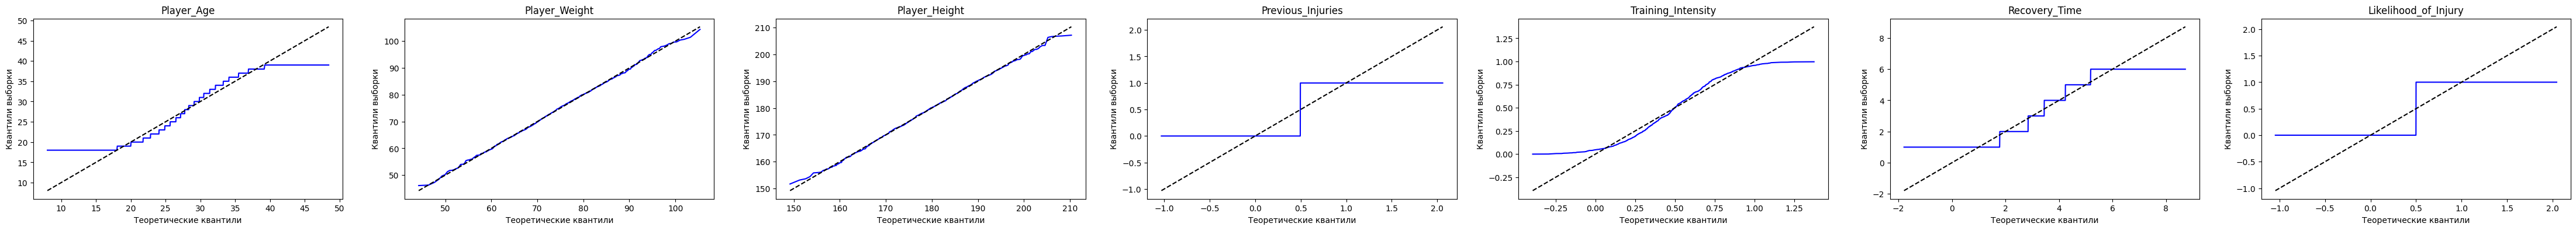

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.plot(x, y, color = 'blue')
    ax.plot(x, x, color = 'black', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('Теоретические квантили')
    ax.set_ylabel('Квантили выборки')

Построенные Q-Q прямые подтвердили наши предположения. Квантили выборки и теоретические квантили практически совпадают, значит, распределения роста и веса являются нормальными.

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

Player_Age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.575
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Player_Weight
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.683
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.954
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.998

Player_Height
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.676
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.952
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.999

Previous_Injuries
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.515
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Training_Intensity
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.574
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Recovery_Time
1 sigma(s)
	theor

Расчетные цифры оказываются близкими к теоретическим, соответственно, как и предполагалось, распределения роста и веса являются нормальными.


In [ ]:
df[['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time', 'Likelihood_of_Injury']].corr()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
Player_Age,1.000000,-0.040288,0.044957,-0.045610,0.041000,-0.037407,0.000153
Player_Weight,-0.040288,1.000000,0.030543,0.034290,0.044447,-0.060806,0.001843
Player_Height,0.044957,0.030543,1.000000,0.008383,0.048253,0.029176,0.029639
Previous_Injuries,-0.045610,0.034290,0.008383,1.000000,-0.021320,-0.005872,0.038017
Training_Intensity,0.041000,0.044447,0.048253,-0.021320,1.000000,-0.038755,0.089250
Recovery_Time,-0.037407,-0.060806,0.029176,-0.005872,-0.038755,1.000000,-0.015292
Likelihood_of_Injury,0.000153,0.001843,0.029639,0.038017,0.089250,-0.015292,1.000000


Также был произведен анализ корреляции между разными распределениями. Мы видим, что прямая зависимость между всеми распределениями отсутствует (все коэффициенты сильно меньше 1, либо даже отрицательны).

Мы также можем увидеть отсутствие линейной зависимостм величин с помощью статистического теста и визуализации. Для этого рассмотрим одну из зависимостей: между интенсивностью тренировок и вероятностью травм.

In [ ]:
n = 1000
m = 1

k1 = m
k2 = n - m - 1
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
print('t =',t)

ones = np.ones((n,m))
x_pot = np.hstack((ones, df['Training_Intensity'].values.reshape(n,m)))
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Likelihood_of_Injury'])
z = x_pot.dot(b)
e = df['Likelihood_of_Injury'] - z

R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Likelihood_of_Injury']))


F = (R / k1) / ((1 - R) / k2)
print ('F =', F)

t = 3.850793370783879
F = 8.013539881183911


Коэффициент t немного меньше F, соответственно, линейная зависимость между интенсивностью тренировок и вероятностью травм отсутствует.